#  Food Recommender Systems

An attempt to produce a nutrient-based meal recommender that makes meal recommendations catering to users’ fine-grained food preferences and nutritional needs through the use of machine learning techniques.

## Methodology

We will be trying to develop a cluster of similar food items using the dataset consists of food items and their corresponding calorie content, protein content and the ingredients they are made of.

Firstly, We will be importing the required Python libraries.

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD, PCA
import pickle
import random
import seaborn as sns

In [63]:
dataset = pd.read_csv('refined_rel.csv')
dataset.head()

,Gender,Height,Weight,Index,bmi,active,calorie_needs
0,1,1.74,96,4,31.708284,0,2119
1,1,1.89,87,2,24.355421,2,3456
2,0,1.85,110,4,32.140248,0,2428
3,0,1.95,104,3,27.350427,1,2295
4,1,1.49,61,3,27.476240,2,1346


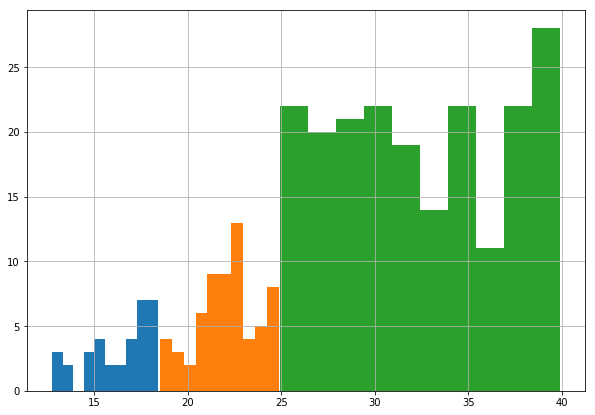

In [64]:
dataset.bmi[(dataset.bmi<=18.5)].hist(figsize=(10,7))
dataset.bmi[(dataset.bmi>18.5) & (dataset.bmi<=24.9)].hist(figsize=(10,7))
dataset.bmi[(dataset.bmi>24.9) & (dataset.bmi<40)].hist(figsize=(10,7))

Less than 18.5 > Undernourished (Requires medical guidance)

18.5 to 24.9 > Normal BMI

greater 24.9 > Overnourished

In [65]:
X = dataset.iloc[:,[1,2,4,5]].values
y = dataset.iloc[:, 6].values
X

array([[  1.74      ,  96.        ,  31.70828379,   0.        ],
       [  1.89      ,  87.        ,  24.35542118,   2.        ],
       [  1.85      , 110.        ,  32.14024836,   0.        ],
       ...,
       [  1.41      , 136.        ,  68.40702178,   0.        ],
       [  1.5       ,  95.        ,  42.22222222,   0.        ],
       [  1.73      , 131.        ,  43.77025627,   1.        ]])

In [66]:
ohe1 = OneHotEncoder(categorical_features = [3])
X = ohe1.fit_transform(X).toarray()
X = X[:,1:]
X

array([[  0.        ,   0.        ,   1.74      ,  96.        ,
         31.70828379],
       [  0.        ,   1.        ,   1.89      ,  87.        ,
         24.35542118],
       [  0.        ,   0.        ,   1.85      , 110.        ,
         32.14024836],
       ...,
       [  0.        ,   0.        ,   1.41      , 136.        ,
         68.40702178],
       [  0.        ,   0.        ,   1.5       ,  95.        ,
         42.22222222],
       [  1.        ,   0.        ,   1.73      , 131.        ,
         43.77025627]])

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =0)
X_train.shape

(400, 5)

In [68]:
X_test.shape

(100, 5)

In [69]:
regressor = RandomForestRegressor(n_estimators = 20, random_state=0)
regressor.fit(X_train ,y_train)
y_pred = regressor.predict(X_test)

In [70]:
scores = cross_val_score(estimator = regressor, X = X, y = y, cv = 10)
scores.mean()

0.9570907184704435

In [71]:
scores.std()

0.030045462425043586

This means our predicted daily calorie intake would be correct in 95% of the cases.

Our Pre-trained model can be saved as follows:

In [72]:
save_reg = open('regressor.pickle','wb')
pickle.dump(regressor, save_reg)
save_reg.close()

'''
#Loading a regressor
f = open('regressor.pickle','rb')
r2 = pickle.load(f)
f.close()
user_calories = r2.predict(X_user)
'''

"\n#Loading a regressor\nf = open('regressor.pickle','rb')\nr2 = pickle.load(f)\nf.close()\nuser_calories = r2.predict(X_user)\n"

In [73]:
user_ratings = pd.read_csv('user_ratings.csv', index_col=0)
user_ratings.head()

,9,12,16,19,26,28,32,35,37,46,...,18877,18885,18890,18894,18897,18899,18901,18913,18916,18917
0,,,,,,,,,,,,,,,,,,,,,
afanbunch,1.8,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,...,0.0,2.3,0.0,0.0,0.0,0.0,0.0,0.0,4.7,0.0
samsongiglet,0.0,0.0,1.6,0.0,0.0,2.6,4.2,1.6,2.2,0.0,...,0.0,0.0,2.7,0.0,0.0,0.0,2.9,0.0,0.0,0.0
blakesidaho,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.4,2.8,...,2.4,2.6,0.0,0.0,0.0,0.0,4.3,0.0,0.0,0.0
arrocharlady,0.0,0.0,0.0,0.0,0.0,2.2,4.0,0.0,4.7,2.4,...,0.0,0.0,0.0,1.7,0.0,0.0,0.0,1.3,3.2,0.0
fletchmittens,1.5,4.9,4.3,0.0,0.0,0.0,0.0,1.7,2.6,0.0,...,3.0,0.0,2.1,0.0,0.0,4.3,0.0,2.1,0.0,0.0


This sparse matrix contains the record of users(rows) of how much they have liked a food-item(columns) on a scale of 1-5.
The user have not rated all the food they ate, which are represented by 0 (means NaN)

In [74]:
SVD = TruncatedSVD(n_components=10)
user_based_group = SVD.fit_transform(user_ratings)
user_based_group.shape

(67, 10)

In [75]:
food_based_group = SVD.fit_transform(user_ratings.T)
food_based_group.shape

(5000, 10)

In [76]:
corr_user = np.corrcoef(user_based_group)
corr_user

array([[1.        , 0.83700928, 0.81832517, ..., 0.81123124, 0.79114058,
        0.83234728],
       [0.83700928, 1.        , 0.78021554, ..., 0.8605417 , 0.89058761,
        0.83906788],
       [0.81832517, 0.78021554, 1.        , ..., 0.88097054, 0.71484302,
        0.80045148],
       ...,
       [0.81123124, 0.8605417 , 0.88097054, ..., 1.        , 0.79620949,
        0.79082264],
       [0.79114058, 0.89058761, 0.71484302, ..., 0.79620949, 1.        ,
        0.92131378],
       [0.83234728, 0.83906788, 0.80045148, ..., 0.79082264, 0.92131378,
        1.        ]])

We are concerned with knowing the similar user taste so that we can recommend what other user enjoys based on their ratings. So, we find the **Pearson Correlation Coefficient** for the same 

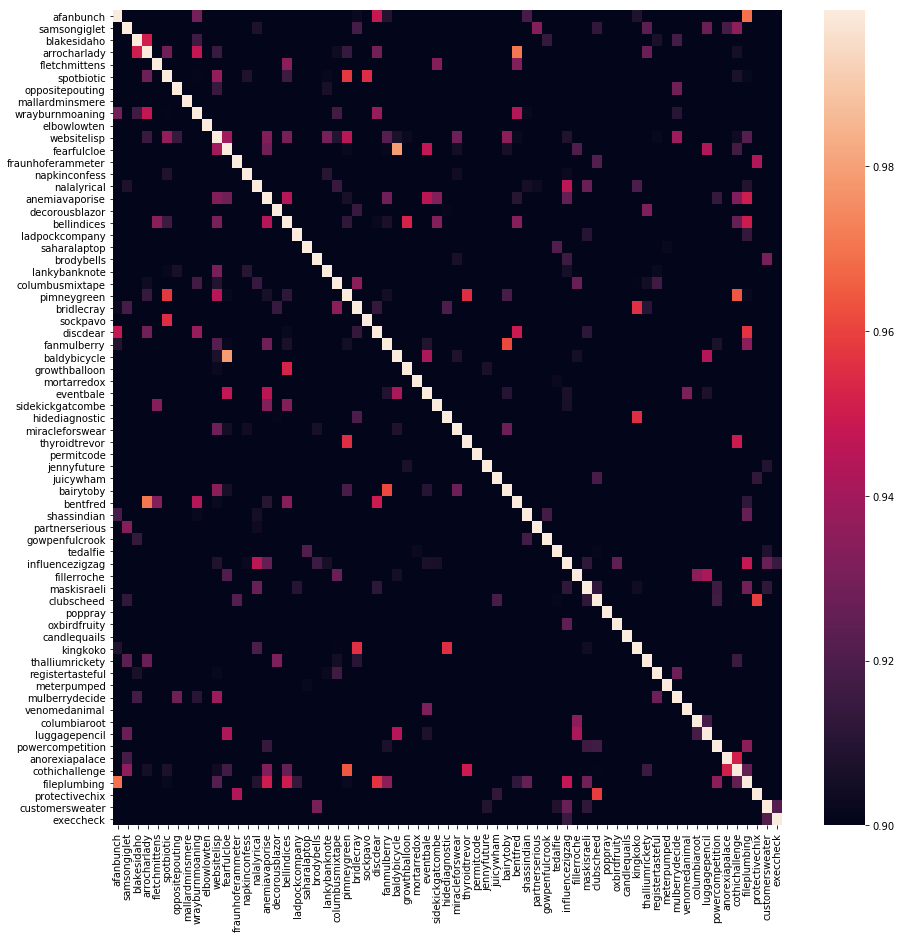

In [77]:
_, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr_user, xticklabels= user_ratings.index, yticklabels = user_ratings.index, vmin=0.90, vmax=0.999, ax=ax)

We will only be considering the coefficient values above 0.9 for each user, as can clearly be seen in the above heatmap.

In [78]:
food_details = pd.read_csv('final.csv')
food_details.head()

,foodID,calories,categories,fat,protein,sodium,title,3,4,7,...,698,701,702,704,705,706,708,709,711,713
0,9,602.0,"['Salad', 'Mustard', 'Potato', 'Picnic', 'Lunc...",41.0,23.0,1696.0,Ham Persillade with Mustard Potato Salad and M...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12,766.0,"['Cake', 'Chocolate', 'Fruit', 'Dessert', 'Bak...",48.0,12.0,439.0,Banana-Chocolate Chip Cake With Peanut Butter ...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16,146.0,"['Bread', 'Milk/Cream', 'Breakfast', 'Brunch',...",5.0,4.0,160.0,Sweet Buttermilk Spoon Breads,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,19,421.0,"['Potato', 'High Fiber', 'Lunch', 'Tuna', 'Asp...",33.0,10.0,383.0,"Tuna, Asparagus, and New Potato Salad with Chi...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,26,215.0,"['Egg', 'Herb', 'Vegetable', 'Side', 'Easter',...",20.0,6.0,250.0,Cucumber-Basil Egg Salad,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
X_food = food_details.iloc[:, 1:]
X_food = X_food.drop(['calories','protein','fat','categories','sodium','title'],axis=1) 
X_food = X_food.set_index(food_details.foodID)
X

array([[  0.        ,   0.        ,   1.74      ,  96.        ,
         31.70828379],
       [  0.        ,   1.        ,   1.89      ,  87.        ,
         24.35542118],
       [  0.        ,   0.        ,   1.85      , 110.        ,
         32.14024836],
       ...,
       [  0.        ,   0.        ,   1.41      , 136.        ,
         68.40702178],
       [  0.        ,   0.        ,   1.5       ,  95.        ,
         42.22222222],
       [  1.        ,   0.        ,   1.73      , 131.        ,
         43.77025627]])

In [94]:
SVD = TruncatedSVD(n_components=60, random_state=0)
new_X = SVD.fit_transform(X_food)
new_X = pd.DataFrame(new_X, index = food_details.foodID)
new_X.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
foodID,,,,,,,,,,,,,,,,,,,,,
9,2.479466,-0.800722,-0.407238,0.198730,-1.256370,0.495130,-0.287964,0.091194,0.016568,-0.118602,...,0.220446,0.122989,0.181667,-0.214790,0.339954,-0.160438,-0.244196,-0.025301,0.081044,0.212374
12,2.715094,2.196650,0.544600,-0.474056,0.186128,0.147699,-0.010808,-0.722765,-0.009604,-0.214561,...,-0.052376,-0.082633,0.260575,0.055987,0.420558,0.143491,-0.081822,-0.026900,-0.159422,0.118886
16,3.285115,2.173067,0.425611,-0.607339,-0.137839,-0.230782,-0.333966,0.730670,0.149327,-0.047117,...,0.089878,0.600565,-0.276427,0.114567,-0.049432,-0.063632,-0.168329,0.287716,0.137502,0.069831
19,2.758737,0.438775,0.973409,0.763720,-0.605207,-0.318581,-0.092752,-0.004107,0.217826,-0.401007,...,-0.267456,0.245944,0.030680,-0.205271,0.027923,-0.111050,-0.090112,-0.153075,0.137658,0.071082
26,3.738608,0.211728,-0.547477,-0.015350,-0.532686,0.763621,-0.927444,-0.765827,-0.080826,-0.204085,...,-0.145887,-0.364869,0.016272,0.149478,-0.188656,0.124731,-0.044696,0.232574,-0.250170,0.075052


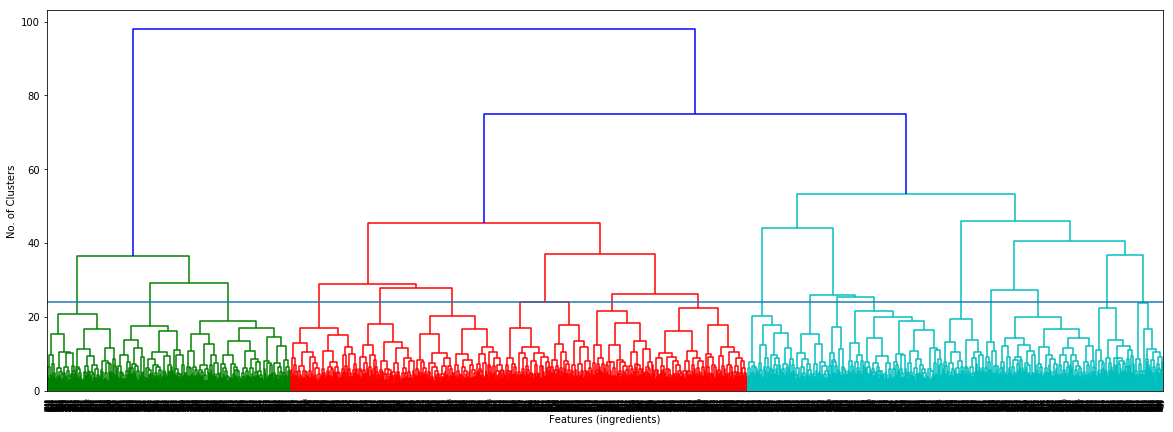

In [90]:
import scipy.cluster.hierarchy as sch
plt.subplots(figsize=(20,7))
plt.axhline(y=24)
plt.ylabel("No. of Clusters")
plt.xlabel("Features (ingredients)")
dendrogram = sch.dendrogram(sch.linkage(new_X, method="ward"))

We will be considering K=24 clusters to put similar food into the same category. 

Apply K-Means Clustering afterwards

In [95]:
kmeans = KMeans(n_clusters = 24)
y_means = kmeans.fit_predict(new_X)

In [96]:
y_means

array([20,  6, 14, ...,  3, 10, 16], dtype=int32)

Through the use of above model, using user's BMI we can predict his daily calorie requirement using **Calorie prediction model**. Ask for user's feedback about different food items and store as ratings. Use the cluster of similar food items that we created above. Recommend other food items belonging to that cluster and also similar user taste preferences. 

This will generate a corresponding food dataset for each user. This dataset can then be processed to extract food as per need for breakfast, lunch or dinner. The sum of calorie consumed per day should satisfy daily calorie requirement.

In this way Clustering algorithms and Dimensionality reduction techniques can be used to produce a simple food recommender systems. There is always a scope for improving the efficiency and accuracy of the model.